In [5]:
import tensorflow as tf
import numpy as np
import time as time

import matplotlib.pyplot as plt
import utils

In [21]:
learning_rate = 0.003
n_epochs = 70
n_train = 55000
n_test = 10000
n_val = 5000
batch_size = 128

In [7]:
notmnist_folder = "./data/notmnist"
train, val, test = utils.read_mnist(notmnist_folder, flatten=True)

In [8]:
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(1000)
train_data = train_data.batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

In [9]:
iterator = tf.data.Iterator.from_structure(train_data.output_types, train_data.output_shapes)

train_iter = iterator.make_initializer(train_data)
test_iter = iterator.make_initializer(test_data)

img,label = iterator.get_next()

In [10]:
w1 = tf.get_variable("weights1",shape=(784,256), initializer = tf.truncated_normal_initializer())
b1 = tf.get_variable("bias1", shape = (1,256), initializer = tf.zeros_initializer())
w2 = tf.get_variable("weights2", shape=(256,64), initializer = tf.truncated_normal_initializer())
b2 = tf.get_variable("bias2", shape = (1,64), initializer = tf.zeros_initializer())
w3 = tf.get_variable("weights3", shape=(64,10), initializer = tf.truncated_normal_initializer())
b3 = tf.get_variable("bias3", shape = (1,10), initializer = tf.zeros_initializer())

In [11]:
z1 = tf.matmul(img, w1) + b1 
a1 = tf.nn.relu(z1)
z2 = tf.matmul(a1, w2) + b2
a2 = tf.nn.relu(z2)
#z3 = tf.matmul(a2, w3) + b3
#a3 = tf.nn.relu(z3)
logits = tf.matmul(a2,w3) + b3
#logits = tf.matmul(img, w1) + b1 

predictions = tf.nn.softmax(logits)

In [12]:
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = label, name = "entropy")
loss = tf.reduce_mean(entropy, name = "loss")

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [14]:
correct_preds = tf.equal(tf.argmax(predictions,1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

In [22]:
loss_list = []
epoch_list = []
with tf.Session() as sess:
    start = time.time()
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        sess.run(train_iter)
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _,l = sess.run([optimizer,loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        print("Average loss epoch {0}: {1}".format(i,total_loss/n_batches))
        loss_list.append(total_loss/n_batches)
        epoch_list.append(i)
    print("Finished training! Total time taken {0}s". format(time.time()-start))
    
    sess.run([test_iter])
    total_loss = 0
    total_accuracy = 0
    try:
        while True:
            acc = sess.run(accuracy)
            total_accuracy += acc
    except tf.errors.OutOfRangeError:
        pass
    print("Accuracy = {0}".format(total_accuracy/n_test))

Average loss epoch 0: 22.126540309052135
Average loss epoch 1: 1.9657762427662695
Average loss epoch 2: 1.7612511166306428
Average loss epoch 3: 1.6243809480999791
Average loss epoch 4: 1.5338214682978253
Average loss epoch 5: 1.5399805221446725
Average loss epoch 6: 1.5072885945785877
Average loss epoch 7: 1.4686711569165074
Average loss epoch 8: 1.2323091728742732
Average loss epoch 9: 1.1779686326204344
Average loss epoch 10: 1.1504267900489098
Average loss epoch 11: 1.1365213783674462
Average loss epoch 12: 1.1094352510086325
Average loss epoch 13: 1.0814270679340807
Average loss epoch 14: 1.0064593225024467
Average loss epoch 15: 1.0060631774192632
Average loss epoch 16: 0.9690099822920423
Average loss epoch 17: 0.8340606306874475
Average loss epoch 18: 0.7922505933878033
Average loss epoch 19: 0.8072782536578733
Average loss epoch 20: 0.7629858858363573
Average loss epoch 21: 0.7105470304572306
Average loss epoch 22: 0.6795147618582082
Average loss epoch 23: 0.6401158257972362
Av

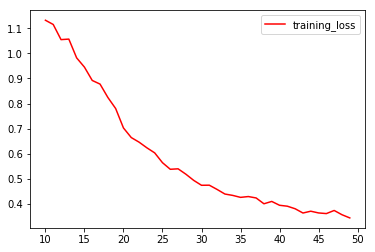

In [20]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()

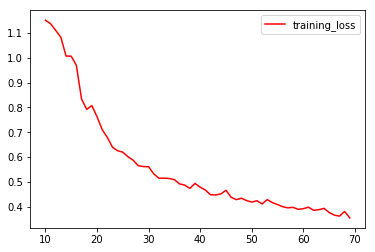

In [23]:
plt.plot(epoch_list[10:],loss_list[10:], 'r', label = "training_loss")
plt.legend()
plt.show()